Mean Squared Error: 1.3219941305170215e+26
R-squared: -2.7193195447876784e+17


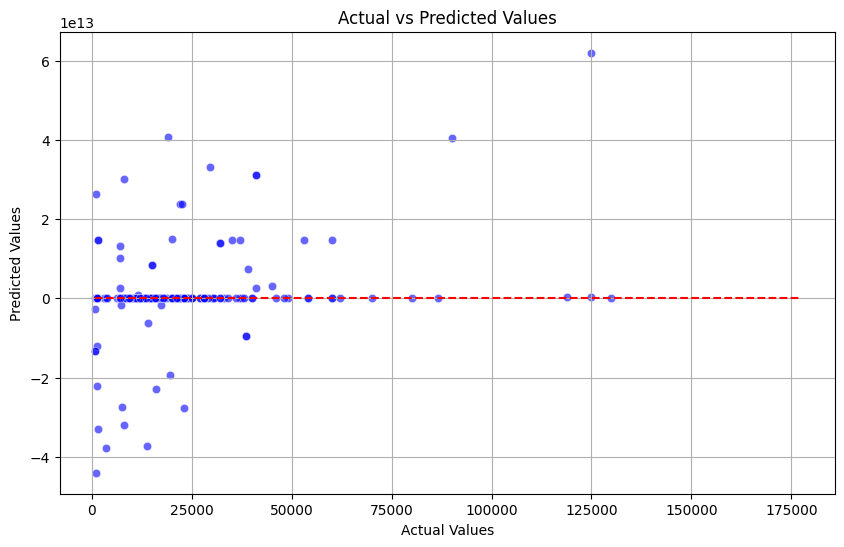

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
data = pd.read_csv('C:\\Users\\Lenovo\\Desktop\\jupyter projects\\Mobiles_Dataset.csv')

# Strip whitespace from column names and convert to lowercase
data.columns = data.columns.str.strip().str.lower()

# Clean the 'discount price' column by removing non-numeric characters and handling empty strings
data['discount price'] = data['discount price'].replace('[\₹,]', '', regex=True).replace('', pd.NA).replace(' ', pd.NA)

# Convert the cleaned 'discount price' to float, coercing errors to NaN
data['discount price'] = pd.to_numeric(data['discount price'], errors='coerce')

# Drop rows with NaN in the target variable
data.dropna(subset=['discount price'], inplace=True)

# Define features (X) and target variable (y)
X = data.drop(['discount price', 'product name', 'description', 'link'], axis=1)
y = data['discount price']

# Convert the remaining categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()